In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE3D import PATH 
from PDE3D.BoundaryShape import * 
import os 
from matplotlib import gridspec
import matplotlib
import matplotlib.ticker as ticker
from PDE3D.utils import *

matplotlib.rcParams.update(MPL_STYLE)
frame_color = "white"
col_width = COLUMN_WIDTH

In [2]:
name = "motorbike-engine"
folder_name = os.path.join(PATH, "scenes", name)
xml_name = os.path.join(folder_name, "scene.xml")
sdf_data = np.load(os.path.join(folder_name, "sdf.npy")) - 0.002
boundary = SDF(sdf_data, scale = 12, mesh_scene_xml=xml_name)

jit_flush_malloc_cache(): Dr.Jit exhausted the available memory and had to flush its allocation cache to free up additional memory. This is an expensive operation and will have a negative effect on performance. You may want to change your computation so that it uses less memory. This warning will only be displayed once.


In [3]:
slice = Slice(offset =0.0, scale = 7, axis = "z")
cam_origin = mi.ScalarPoint3f([7.8,7,20])
scale_cam = 0.28
cam_target = mi.ScalarPoint3f([0,-0.1,-0.2])
cam_up = mi.ScalarPoint3f([0,1,0])
cam_res = [1024, 1024]
spp = 512

cmap = "coolwarm"

In [4]:
res_primal = 4
fd = 0.001
res_tensor = 5
path = os.path.join(PATH, "output3D", "finite_differences", "variable")
source_prb =np.load(os.path.join(path, f"source-resprimal{res_primal}", f"source{res_tensor}-prb.npy"))
source_fd =np.load(os.path.join(path, f"source-resprimal{res_primal}", f"source{res_tensor}-fd{fd}.npy"))
screening_prb = np.load(os.path.join(path, f"screening-resprimal{res_primal}", f"screening{res_tensor}-prb.npy"))
screening_fd = np.load(os.path.join(path, f"screening-resprimal{res_primal}", f"screening{res_tensor}-fd{fd}.npy"))
diffusion_prb = np.load(os.path.join(path, f"diffusion-resprimal{res_primal}", f"diffusion{res_tensor}-prb.npy"))
diffusion_fd = np.load(os.path.join(path, f"diffusion-resprimal{res_primal}", f"diffusion{res_tensor}-fd{fd}.npy"))

In [5]:
bbox = boundary.bbox
bbox_pad = (bbox.max - bbox.min) / 10
bbox_coeff = mi.ScalarBoundingBox3f(bbox.min - bbox_pad, bbox.max + bbox_pad) 

f_prb = TextureCoefficient("prb", bbox_coeff, source_prb, interpolation="nearest")
f_fd  = TextureCoefficient( "fd", bbox_coeff, source_fd, interpolation = "nearest")
σ_prb = TextureCoefficient("prb", bbox_coeff, screening_prb, interpolation = "nearest")
σ_fd = TextureCoefficient("fd", bbox_coeff, screening_fd, interpolation = "nearest")
α_prb = TextureCoefficient("prb", bbox_coeff, diffusion_prb, interpolation = "nearest")
α_fd = TextureCoefficient("fd", bbox_coeff, diffusion_fd, interpolation = "nearest")

In [6]:
f_prb_3D, f_prb_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= f_prb, sym_colorbar = True)
f_fd_3D, f_fd_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= f_fd, sym_colorbar = True)

σ_prb_3D, σ_prb_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= σ_prb, sym_colorbar = True)
σ_fd_3D, σ_fd_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= σ_fd, sym_colorbar = True)

α_prb_3D, α_prb_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= α_prb, sym_colorbar = True)
α_fd_3D, α_fd_norm = boundary.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, 
                                          coeff= α_fd, sym_colorbar = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355973].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355975].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355976].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355975].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355975].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7355974].
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertin

'/home/ekrem/repos/MC-PDE3D/figures/fd_3D/fd_3D.pdf'

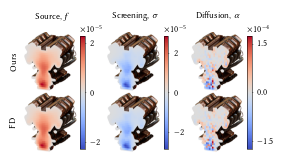

In [7]:
imsize = 30
imsize_h = 24
imsize_v = 27
pre_offset = 1
offset = 2
post_offset = 10
cbar_begin_offset = 2
cbar_end_offset = 6
o1 = 10
o2 = 5
total_offset = pre_offset + offset + post_offset

lx = 2 * imsize_v + o1
ly = (3 * imsize_h + 3 * total_offset + o2)
scale = col_width / ly
fig = plt.figure(figsize = (ly * scale, lx * scale))
g = gridspec.GridSpec(lx, ly, figure = fig, wspace =0, hspace=0)

ax = fig.add_subplot(g[:,:])
disable_ticks(ax)
plt.setp(ax.spines.values(), color=frame_color)
f_prb_ax = fig.add_subplot(g[0 + o1 : imsize_v+ o1 , 0 + o2 : imsize_h+ o2 ])
f_fd_ax = fig.add_subplot(g[imsize_v+ o1  : 2 * imsize_v+ o1 , 0+ o2  : imsize_h+ o2 ])

σ_prb_ax = fig.add_subplot(g[0 + o1 : imsize_v+ o1 , imsize_h + total_offset + o2 : 2 * imsize_h + total_offset+ o2 ])
σ_fd_ax = fig.add_subplot(g[imsize_v + o1 : 2 * imsize_v+ o1 , imsize_h + total_offset+ o2  : 2 * imsize_h + total_offset+ o2 ])

α_prb_ax = fig.add_subplot(g[0 + o1 : imsize_v+ o1 , 2 * imsize_h + 2 * total_offset+ o2  : 3 * imsize_h + 2 * total_offset+ o2 ])
α_fd_ax = fig.add_subplot(g[imsize_v + o1 : 2 * imsize_v+ o1 , 2 * imsize_h + 2 * total_offset+ o2  : 3 * imsize_h + 2 * total_offset+ o2 ])

f_cbar_ax = fig.add_subplot(g[cbar_begin_offset + o1 :2 * imsize_v+ o1  - cbar_begin_offset, imsize_h + pre_offset+ o2  : imsize_h + pre_offset + offset+ o2 ])
σ_cbar_ax = fig.add_subplot(g[cbar_begin_offset+ o1  :2 * imsize_v - cbar_begin_offset+ o1 , 
                              2 * imsize_h + total_offset + pre_offset+ o2  : 2 * imsize_h + total_offset + pre_offset + offset+ o2 ])
α_cbar_ax = fig.add_subplot(g[cbar_begin_offset+ o1  :2 * imsize_v - cbar_begin_offset+ o1, 
                              3 * imsize_h + 2 * total_offset + pre_offset+ o2  : 3 * imsize_h + 2 * total_offset + pre_offset + offset+ o2 ])

disable_border(f_prb_ax)
disable_ticks(f_prb_ax)
disable_border(σ_prb_ax)
disable_ticks(σ_prb_ax)
disable_border(α_prb_ax)
disable_ticks(α_prb_ax)

disable_border(f_fd_ax)
disable_ticks(f_fd_ax)
disable_border(σ_fd_ax)
disable_ticks(σ_fd_ax)
disable_border(α_fd_ax)
disable_ticks(α_fd_ax)



plot_image_3D(f_prb_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):], f_prb_ax, cmap = cmap)
plot_image_3D(f_fd_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):], f_fd_ax, cmap = cmap)

plot_image_3D(σ_prb_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):],  σ_prb_ax, cmap = cmap)
plot_image_3D(σ_fd_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):], σ_fd_ax, cmap = cmap)

plot_image_3D(α_prb_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):], α_prb_ax, cmap = cmap)
plot_image_3D(α_fd_3D[:int(imsize_v / imsize * cam_res[0]), -int(imsize_h / imsize * cam_res[1]):], α_fd_ax, cmap = cmap)

num_ticks = 3
f_cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=f_fd_norm, cmap=cmap), cax=f_cbar_ax, orientation='vertical')
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
f_cbar.locator = tick_locator
f_cbar.formatter.set_powerlimits((0, 0))
f_cbar.ax.yaxis.set_offset_position('left') 
f_cbar.update_ticks()

σ_cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=σ_fd_norm, cmap=cmap), cax=σ_cbar_ax, orientation='vertical')
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
σ_cbar.locator = tick_locator
σ_cbar.formatter.set_powerlimits((0, 0))
σ_cbar.ax.yaxis.set_offset_position('left') 
σ_cbar.update_ticks()

α_cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=α_fd_norm, cmap=cmap), cax=α_cbar_ax, orientation='vertical')
tick_locator = ticker.MaxNLocator(nbins=num_ticks)
α_cbar.locator = tick_locator
α_cbar.formatter.set_powerlimits((0, 0))
α_cbar.ax.yaxis.set_offset_position('left') 
α_cbar.update_ticks()

pad = 10
f_prb_ax.set_title(r"Source, $f$", pad = pad, fontsize = DEFAULT_FONTSIZE_SMALL)
σ_prb_ax.set_title(r"Screening, $\sigma$", pad = pad, fontsize = DEFAULT_FONTSIZE_SMALL)
α_prb_ax.set_title(r"Diffusion, $\alpha$", pad = pad, fontsize = DEFAULT_FONTSIZE_SMALL)

f_prb_ax.set_ylabel("Ours")
f_fd_ax.set_ylabel("FD")

plt.savefig(os.path.join(PATH, "figures", "png", "fd_3D.png"), bbox_inches='tight', pad_inches=0.04, dpi=1000)
save_fig("fd_3D", os.path.join(PATH, "figures"))